In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import glob

In [3]:
data = pd.read_csv('./simulation_explanation/model_data_analysis.csv')
# Recalculate necessary columns for the stacked area chart
data['Highly_Cooperative'] = data['perc_cooperative'] >= 0.75
data['Highly_Uncooperative'] = data['perc_uncooperative'] >= 0.75
data['Middle'] = ~(data['Highly_Cooperative'] | data['Highly_Uncooperative'])
data.head(12)

,step,cc,cd,dc,dd,game_type,avg_incl,pr_adv_coop,pr_hyp_adv_c_play_d,pr_hyp_adv_d_play_c,perc_cooperative,perc_uncooperative,perc_middle,variance_inclinations,Highly_Cooperative,Highly_Uncooperative,Middle
0,0,3.000000,0.000000,5.0,1.0,PD,0.500000,0.500000,0.0,0.0,0.0,0.0,1.0,0.068182,False,False,True
1,1,3.000000,0.000000,5.0,1.0,PD,0.503125,0.500000,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
2,2,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
3,3,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
4,4,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
5,5,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
6,6,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
7,7,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
8,8,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True
9,9,2.333333,-0.666667,6.0,2.0,PD,0.503125,0.416667,0.0,0.0,0.0,0.0,1.0,0.066594,False,False,True


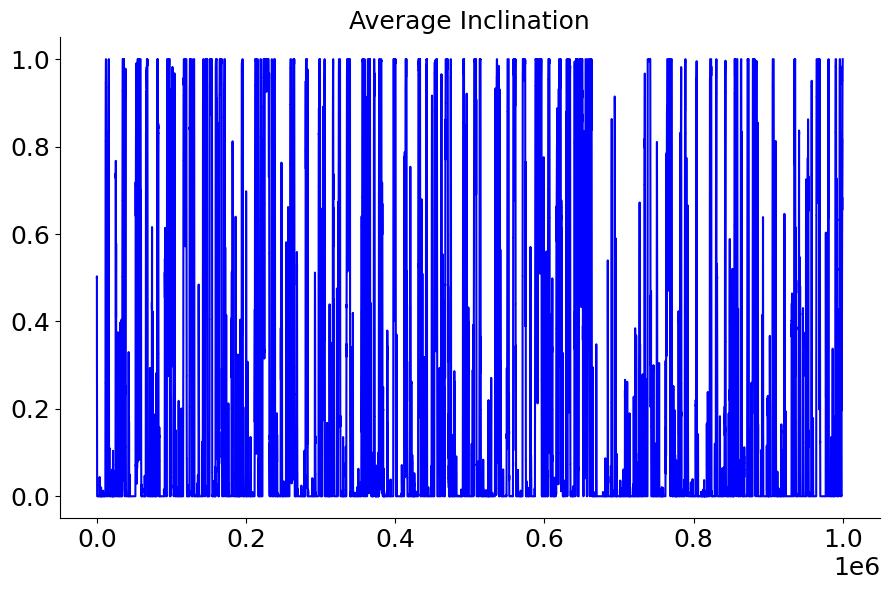

In [4]:
import matplotlib.pyplot as plt
df = data
df_sampled = df

fontsize = 18
plt.figure(figsize=(9, 6))
plt.plot(df_sampled['step'], df_sampled['avg_incl'], label='Average Inclination', color='blue')
plt.title('Average Inclination', fontsize=fontsize)
plt.ylabel('', fontsize=fontsize)
#plt.legend()

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.gca().xaxis.get_offset_text().set_fontsize(fontsize)

plt.grid(False)

sns.despine()

plt.tight_layout()
plt.savefig('avg_inclinations_for_analysis_figure.pdf')
plt.show()




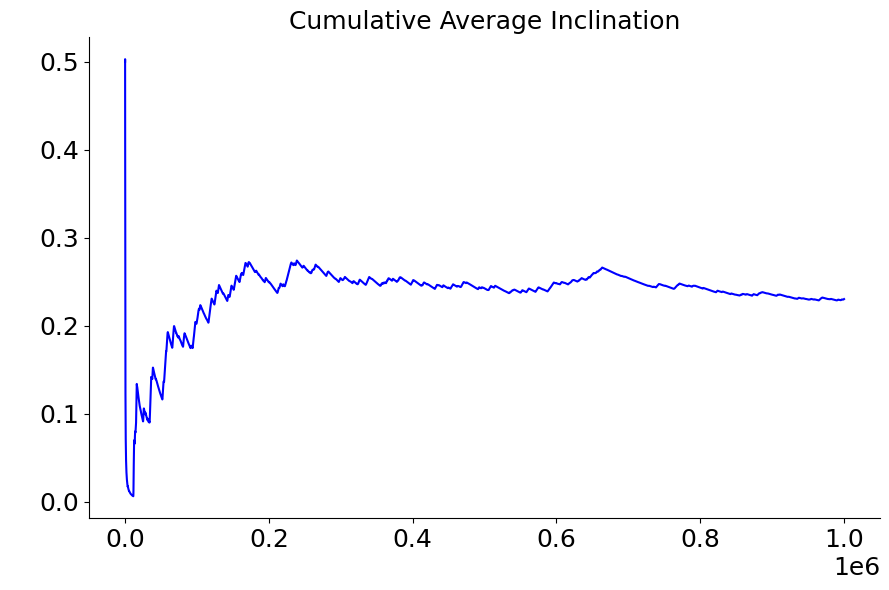

In [5]:
df = data
df_sampled = df

fontsize = 18
plt.figure(figsize=(9, 6))

plt.plot(data['step'], data['avg_incl'].expanding().mean(),  color='blue')
plt.title('Cumulative Average Inclination', fontsize=fontsize)
plt.xlabel('', fontsize=fontsize)
plt.ylabel(' ', fontsize=fontsize)

plt.grid(False)

sns.despine()
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.gca().xaxis.get_offset_text().set_fontsize(fontsize)

plt.tight_layout()
plt.savefig('cai_for_analysis_figure.pdf')

plt.show()
#axs[0].legend()


0.15787884212115788


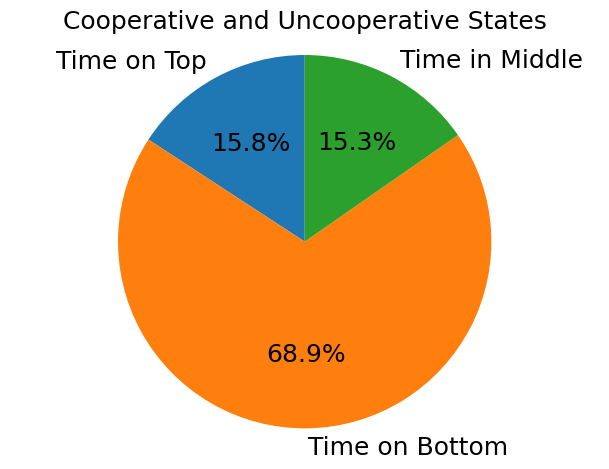

In [6]:
import matplotlib.pyplot as plt

fontsize = 18

# Compute necessary values
time_highly_cooperative = data['Highly_Cooperative'].mean()
print(time_highly_cooperative)
time_highly_uncooperative = data['Highly_Uncooperative'].mean()
time_middle = data['Middle'].mean()

# Ratio of Highly Cooperative to Highly Uncooperative
ratio_coop_uncoop = time_highly_cooperative / time_highly_uncooperative if time_highly_uncooperative != 0 else float('inf')

# Ordered fraction (1 - time in middle)
ordered_fraction = 1 - time_middle

# Prepare data for plotting
labels = ['Time on Top', 'Time on Bottom', 'Time in Middle']
values = [time_highly_cooperative, time_highly_uncooperative, time_middle]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': fontsize})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Annotations
plt.title('Cooperative and Uncooperative States', fontsize=fontsize)
#plt.figtext(0.5, -0.1, f'Ratio of Highly Cooperative to Uncooperative: {ratio_coop_uncoop:.2f}\nOrdered Fraction: {ordered_fraction:.2f}', ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('proportion_of_states_for_analysis_figure.pdf')
plt.show()

In [7]:
time_highly_cooperative = data['Highly_Cooperative'].mean()
print(time_highly_cooperative)
time_highly_uncooperative = data['Highly_Uncooperative'].mean()
time_middle = data['Middle'].mean()

# Ratio of Highly Cooperative to Highly Uncooperative
ratio_coop_uncoop = time_highly_cooperative / time_highly_uncooperative if time_highly_uncooperative != 0 else float('inf')

# Ordered fraction (1 - time in middle)
ordered_fraction = 1 - time_middle

# get last element of the expanding mean
# Step 1: Define the state transitions list correctly based on the dataset
states_transitions = []

# Convert boolean columns to state identifiers
for i in range(len(data)):
    if data.loc[i, 'Highly_Cooperative']:
        states_transitions.append('Cooperative')
    elif data.loc[i, 'Highly_Uncooperative']:
        states_transitions.append('Uncooperative')
    else:
        states_transitions.append('Middle')

# Initialize variables for cycle detection
cycle_count = 0
in_transition = False  # Flag to track ongoing transitions

# Track transitions for debugging
transitions_debug = []

# Step 2: Manually iterate over the dataset to identify transitions
for i in range(1, len(states_transitions)):
    current_state = states_transitions[i]
    previous_state = states_transitions[i-1]
 
    if previous_state == 'Cooperative' and current_state == 'Uncooperative':
        in_transition = True
    elif previous_state == 'Cooperative' and current_state == 'Middle':
        in_transition = True
    elif in_transition and current_state == 'Cooperative':
        cycle_count += 1
        in_transition = False  # Reset transition flag after completing a cycle

# Calculate the average cycling frequency
cycling_frequency = cycle_count / (len(data) - 1) if len(data) > 1 else 0


print("CAI ",  data['avg_incl'].expanding().mean().iloc[-1])
print("Degree of Cooperativeness", ratio_coop_uncoop)
print("Order Degree ", ordered_fraction)
print("Cycle Frequency ", cycling_frequency)

0.15787884212115788
CAI  0.23038575886255822
Degree of Cooperativeness 0.22920078278341058
Order Degree  0.8467021532978467
Cycle Frequency  0.000158


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_40616/1813553821.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='numrounds', y='cai', data=data, inner='quartile', scale='width',)


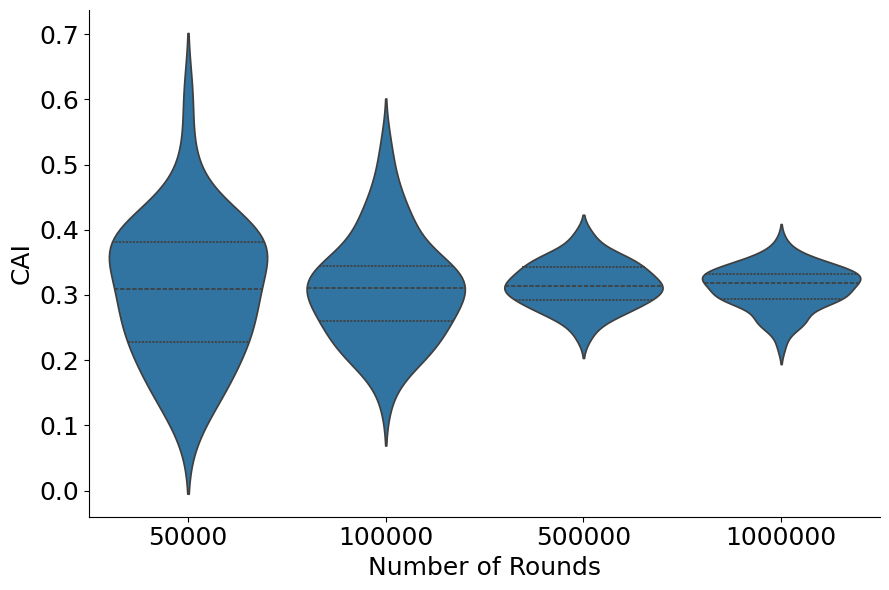

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fontsize = 18
# Load the data
file_path = './diff_num_rounds/diff_num_rounds.csv'
data = pd.read_csv(file_path)

# Set up the violin plot for CAI values based on the number of rounds
plt.figure(figsize=(9, 6))
sns.violinplot(x='numrounds', y='cai', data=data, inner='quartile', scale='width',)
plt.title('')
plt.xlabel('Number of Rounds', fontsize=fontsize)
plt.ylabel('CAI', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
sns.despine()

plt.tight_layout()
# Display the plot
plt.savefig('cai_numrounds.pdf')
plt.show()


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_40616/1118209689.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='numrounds', y='order_degree', data=data, inner='quartile', scale='width',)


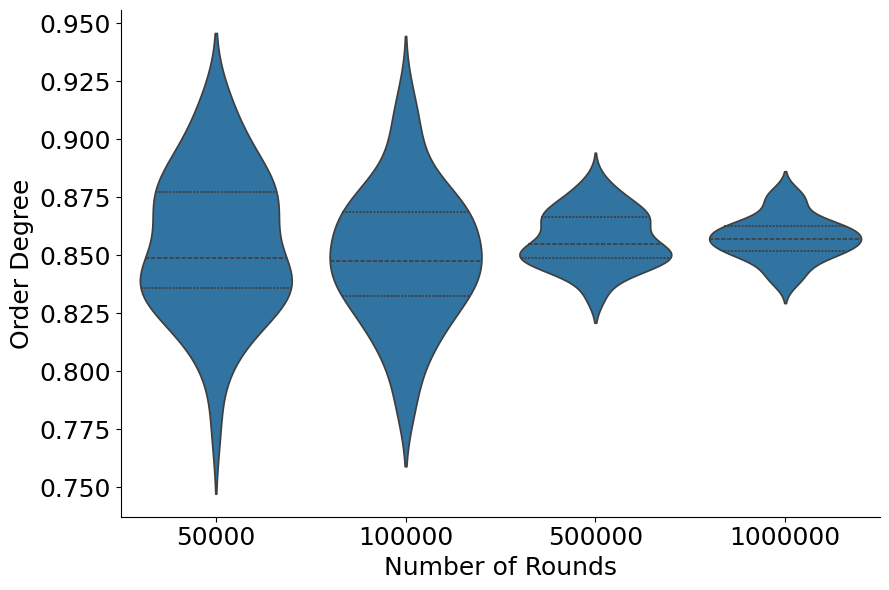

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fontsize = 18
# Load the data
file_path = './diff_num_rounds/diff_num_rounds.csv'
data = pd.read_csv(file_path)

# Set up the violin plot for CAI values based on the number of rounds
plt.figure(figsize=(9, 6))
sns.violinplot(x='numrounds', y='order_degree', data=data, inner='quartile', scale='width',)
plt.title('')
plt.xlabel('Number of Rounds', fontsize=fontsize)
plt.ylabel('Order Degree', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
sns.despine()

plt.tight_layout()
# Display the plot
plt.savefig('order_degree_numrounds.pdf')
plt.show()
